In [1]:
#load libraries
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

#various machinie learning models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC


In [ ]:
# loading data direct from url dataset
url= "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names=['sepal-length','sepal-width','petal-length','petal-width','class']
dataset=pd.read_csv(url,names=names)

In [ ]:
dataset

In [ ]:
dataset.describe()

In [ ]:
import matplotlib.pyplot as plt
plt.barh([1,2,3,4,5,6],[14,24,74,49,31,100],label="uttarprades")
plt.show()

In [ ]:
#class distribution
dataset.groupby('class').size()

In [ ]:
dataset.plot(kind='box',subplots=True,layout=(2,2),sharex=False,sharey=False)
plt.show()

In [ ]:
    dataset.hist()
    plt.show()

In [ ]:
scatter_matrix(dataset)
plt.show()

# Creating a validation dataset


In [ ]:
# split_out validation Dataset
array=dataset.values
X=array[:,0:4]
Y=array[:,4]
len(X)

In [ ]:
from sklearn import model_selection
validation_size=0.20
seed=44
scoring='accuracy'
X_train,X_validation,Y_train,Y_validation=model_selection.train_test_split(X,Y,test_size=validation_size,random_state=seed)
len(X_train)

In [ ]:
models=[]
models.append(('LR',LogisticRegression(solver='liblinear',multi_class='ovr')))
models.append(('LDA',LinearDiscriminantAnalysis()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('CART',DecisionTreeClassifier()))
models.append(('NB',GaussianNB()))
models.append(('SVM',SVC(gamma='auto')))
#evalute each model in turn
results=[]
names=[]
for name,model in models:
    kfold=model_selection.KFold(n_splits=10)
    cv_results=model_selection.cross_val_score(model,X_train,Y_train,cv=kfold,scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name,cv_results.mean(),cv_results.std())
    print(msg)


In [ ]:
#compare Algorthims
fig=plt.figure()
fig.suptitle("Algorthims comparision")
ax=fig.add_subplot(111)
plt.boxplot(results,showmeans=True)
ax.set_xticklabels(names)
plt.show()



Now we select two model KNN and svm as it have high mean value and low standard variance 
# NOW PREDECTION 
   since Accuracy will not always be the matrics to select the best model from

In [ ]:
# Make predictions on validation dataset
svm=SVC(gamma='auto')
svm.fit(X_train,Y_train)
predictions= svm.predict(X_validation)
print(accuracy_score(Y_validation,predictions))
print(confusion_matrix(Y_validation,predictions))
print(classification_report(Y_validation,predictions))


In [ ]:
knn=KNeighborsClassifier()
knn.fit(X_train,Y_train)
predictions=knn.predict(X_validation)
print(accuracy_score(Y_validation,predictions))
print(confusion_matrix(Y_validation,predictions))
print(classification_report(Y_validation,predictions))


## LINEAR REGRESSION

In [ ]:
df1=pd.read_csv("Boston1.csv")

In [ ]:
df1

Target variable is medv which we want to predict

In [ ]:
df1.shape

In [ ]:
df1.describe()

In [ ]:
df1.head()

In [ ]:
df1.describe().T

In [ ]:
# check which is highely correalted with the target vaiable either positive or negative so here are two 
#variable rm and lstat with medv aslo other also have good correlation with medv such has indus and nox but 
#when we do with bigdata set we have to get rid of small correlation
df1.corr()

In [ ]:
df1=df1.drop_duplicates()
df1.shape
#hence there is no duplicate value

In [ ]:
df2=df1.loc[:,["lstat","medv"]]

In [ ]:
import matplotlib.pyplot as plt
df1.plot(x="lstat",y="medv",style="o")



In [ ]:
df2.plot(kind="box",subplots=True,sharex=False,sharey=False)
plt.show()

In [ ]:
x=pd.DataFrame(df1['lstat'])
y=pd.DataFrame(df1['medv'])

In [ ]:
x.size,y.size

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [ ]:
from sklearn.linear_model import LinearRegression
Regressor=LinearRegression()
Regressor.fit(x_train,y_train)

In [ ]:
# TO get the slope m of line
print(Regressor.intercept_)

In [ ]:
# To get the coffeint of line
print(Regressor.coef_)

In [ ]:
y_pre=Regressor.predict(x_test)
y_prediction=pd.DataFrame(y_pre,columns=['predicated'])

In [ ]:
y_prediction.head()

In [ ]:
y_test

In [ ]:
from sklearn import metrics
import numpy as np
# predication based on lstat feature or attribute
print("For vaiable lstat")
print('mean Absolute error: ', metrics.mean_absolute_error(y_test,y_prediction))
print('mean squared error: ', metrics.mean_squared_error(y_test,y_prediction))
print('root mean Absolute error: ', np.sqrt(metrics.mean_absolute_error(y_test,y_prediction)))

In [ ]:
# simlarly let make a model based on rm feature or attribute
x1=pd.DataFrame(df1["rm"])
y1=pd.DataFrame(df1["medv"])


In [ ]:
#can use any one either use sns or motplotlib
import seaborn as sns
sns.scatterplot(x=df1.rm,y=df1.medv)

In [ ]:
import matplotlib.pyplot as plt
df1.plot(x="rm",y="medv",style="*")

In [ ]:
from sklearn.model_selection import train_test_split
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,test_size=0.20,random_state=1)
x1_train.head()

In [ ]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x1_train,y1_train)


In [ ]:
print(regressor.intercept_)

In [ ]:
print(regressor.coef_)

In [ ]:
y1_pred=regressor.predict(x1_test)
y1_prediction=pd.DataFrame(y1_pred,columns=["predicted"])
y1_prediction.head()

In [ ]:
from sklearn import metrics
import numpy as np
# predication based on lstat feature or attribute
print("For variable rm")
print('mean Absolute error: ', metrics.mean_absolute_error(y1_test,y1_prediction))
print('mean squared error: ', metrics.mean_squared_error(y1_test,y1_prediction))
print('root mean Absolute error: ', np.sqrt(metrics.mean_absolute_error(y1_test,y1_prediction)))

In [ ]:
# for multiple features
import pandas as pd
x3=pd.DataFrame(df1.loc[:,['rm','lstat']])
y3=pd.DataFrame(df1.loc[:,['medv']])

In [ ]:
y.head()

In [ ]:
x.size,y.size

In [ ]:
from sklearn.model_selection import train_test_split
x3_train,x3_test,y3_train,y3_test=train_test_split(x3,y3,test_size=0.20,random_state=1)
x3_train.shape

In [ ]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x3_train,y3_train)

In [ ]:
print(regressor.intercept_)

In [ ]:
print(regressor.coef_)

In [ ]:
y3_pred=regressor.predict(x3_test)
y3_prediction=pd.DataFrame(y3_pred,columns=["predicted"])
y3_prediction.head()

In [ ]:
from sklearn import metrics
import numpy as np
# predication based on lstat feature or attribute
print("For variable rm and lstat")
print('mean Absolute error: ', metrics.mean_absolute_error(y3_test,y3_prediction))
print('mean squared error: ', metrics.mean_squared_error(y3_test,y3_prediction))
print('root mean Absolute error: ', np.sqrt(metrics.mean_absolute_error(y3_test,y3_prediction)))

In [ ]:
from sklearn.metrics import r2_score
r2_score(y3_test,y3_prediction)

In [ ]:
import pandas as pd
x4=pd.DataFrame(df1.iloc[:,:-1])
y4=pd.DataFrame(df1.iloc[:,-1])

In [ ]:
y4.head()

In [ ]:
from sklearn.model_selection import train_test_split
x4_train,x4_test,y4_train,y4_test=train_test_split(x4,y4,test_size=0.20,random_state=1)
print(x4_train.shape)
print(x4_test.shape)
print(y4_train.shape)
print(y4_test.shape)

In [ ]:
from sklearn.linear_model import LinearRegression
regressor= LinearRegression()
regressor.fit(x4_train,y4_train)

In [ ]:
print(regressor.intercept_)

In [ ]:
v= pd.DataFrame(regressor.coef_,index=['Co-efficient']).T
w= pd.DataFrame(x4.columns,columns=['Atribute'])
coeff_df=pd.concat([w,v],axis=1,join='inner')
coeff_df


In [ ]:
y4_pred=regressor.predict(x4_test)
y4_prediction=pd.DataFrame(y4_pred,columns=["predicted"])
y4_prediction.head()

In [ ]:
from sklearn import metrics
import numpy as np
# predication based on lstat feature or attribute
print("For all variable ")
print('mean Absolute error: ', metrics.mean_absolute_error(y4_test,y4_prediction))
print('mean squared error: ', metrics.mean_squared_error(y4_test,y4_prediction))
print('root mean Absolute error: ', np.sqrt(metrics.mean_absolute_error(y4_test,y4_prediction)))

Comparing all model based on different or multiple variable we can see the model which take all the variable to train give better performance in comparsion to other 

In [ ]:
from sklearn.metrics import r2_score
r2_score(y4_test,y4_prediction)

## LOGESTIC REGRESSION

In [ ]:
import pandas as pd
df5=pd.read_csv("heart1.csv")

In [ ]:
df5

In [ ]:
df5.target.value_counts()

In [ ]:
import seaborn as sns
sns.countplot(data=df5,x="target")

In [ ]:
x=pd.DataFrame(df5.iloc[:,:-1])
y=pd.DataFrame(df5.iloc[:,-1])

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=0)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

In [ ]:
from sklearn.linear_model import LogisticRegression
logmodel=LogisticRegression()
logmodel.fit(x_train,y_train)

In [ ]:
y_pred=logmodel.predict(x_test)
y_prediction=pd.DataFrame(y_pred)
y_prediction

In [ ]:
print("accuracy score: ",logmodel.score(x_test,y_test))

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_metrix=confusion_matrix(y_test,y_prediction)
print(confusion_metrix)
#accuracy is 50/61

In [ ]:
    from sklearn.metrics import classification_report
print(classification_report(y_test,y_prediction))

In [ ]:
logmodel.predict_proba(x_test)

In [ ]:
z=pd.DataFrame(logmodel.predict_proba(x_test))


In [ ]:
#It help to decide the cut off 
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logistic_roc_auc=roc_auc_score(y_test,logmodel.predict(x_test))
#here logmodel.predict_proba(x_test)[:,1] does not have iloc as it it is in array format not in dataframe 
#only dataframe require iloc or loc function
fpr,tpr,thresolds=roc_curve(y_test,logmodel.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr,tpr,label="Logestic Regression (area=%0.2f)" %logistic_roc_auc)
# to plot the doted line in middel x and y axis
plt.plot([0,1],[0,1],"r--")
#xlim and ylim limits the value of x and y on graph
plt.xlim(0.0,1)
plt.ylim(0.0,1.05)
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.title('Receiver Operating Characteristic')
# to put the label in lower right
plt.legend(loc="lower right")
plt.savefig("LOG_ROC")
plt.show()


In [ ]:
mush_df=pd.read_csv("mushrooms.csv")

In [ ]:
mush_df.head()

In [ ]:
mush_df["class"].value_counts()

In [ ]:
x=list(mush_df.columns)
for i in x:
    z=mush_df[i].unique()
    for a in z:
        if a=="?":
            print(i,z)
        else:
            pass

In [ ]:
#drop the column which have null value
mush_df.drop('stalk-root',axis=1,inplace =True)

In [ ]:
classes=mush_df["class"].unique()
classes

In [ ]:
x=mush_df.drop("class",axis=1)
y=mush_df["class"]

In [ ]:
#to convert the catagorical data into 0,1 by calling get_dummies function
x=pd.get_dummies(x)
x.head()

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=1) 
x_train.shape

In [ ]:
# just to standardise the data on the same scale
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)
x_train

In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier=GaussianNB()
classifier.fit(x_train,y_train)

In [ ]:
y_pred=classifier.predict(x_test)
y_pred

In [ ]:
# if you wanted to see the probability
classifier.predict_proba(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
confusion_matrix(y_test,y_pred)

In [ ]:
accuracy_score(y_test,y_pred)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split  
import warnings
warnings.filterwarnings('ignore')
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import sklearn

# NEW DATASET 

In [ ]:
shoppers=pd.read_csv('online_shoppers_intention.csv')
shoppers

In [ ]:
data=shoppers.copy()

In [ ]:
data[data.duplicated()].count()

In [ ]:
data.drop_duplicates(inplace=True)

In [ ]:
data.info()

In [ ]:
data.Month=data.Month.astype("category")
data.VisitorType=data.VisitorType.astype("category")
data.VisitorType

In [ ]:
data.describe().T

In [ ]:
data.describe(include=['category','bool'])

In [ ]:
data['Month'].unique()

In [ ]:
# While doing uni-variate analysis of numerical variables we want to study their central tendency 
# and dispersion.
# Let us write a function that will help us create boxplot and histogram for any input numerical 
# variable.
# This function takes the numerical column as the input and returns the boxplots 
# and histograms for the variable.
# Let us see if this help us write faster and cleaner code.
def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(x=feature, ax=ax_box2, showmeans=True, color='violet') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins,palette="winter") if bins else sns.distplot(feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='green', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

In [ ]:
histogram_boxplot(data["Administrative_Duration"])

In [ ]:
histogram_boxplot(data["Informational"])

In [ ]:
histogram_boxplot(data["Informational_Duration"])

In [ ]:
ins_col=list(data.columns)
for i in ins_col:
    print(i)
    sns.boxplot(x=data[i])
    plt.show()

In [ ]:
q4=data.Administrative_Duration.quantile(0.75)
q2=data.Administrative_Duration.quantile(0.25)
IQR=(q4-q2)
U=q4+1.5*IQR
L=q4-1.5*IQR
data=data[(data.Administrative_Duration>L)&(data.Administrative_Duration<U)]

In [ ]:
ins_col=list(data.columns)
for i in ins_col:
    print(i)
    sns.boxplot(x=data[i])
    plt.show()

In [ ]:

col_list=[]
for col in ins_col:
    if ((data[col].dtype !='object') & (col !='Revenue')):
        col_list.append(col)

# Bank_additional_data

In [2]:
bank_df1=pd.read_csv("bank-additional-full.csv",sep=";")

In [3]:
bank_df1.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56.0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57.0,services,married,high.school,unknown,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37.0,services,married,high.school,no,yes,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40.0,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56.0,services,married,high.school,no,no,yes,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
import numpy as np
bank_df1['y']=np.where(bank_df1['y']=='yes',1,0)
bank_df1['y']=bank_df1['y'].astype(str)

In [5]:
bank_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41199 entries, 0 to 41198
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41195 non-null  float64
 1   job             41194 non-null  object 
 2   marital         41194 non-null  object 
 3   education       41194 non-null  object 
 4   default         41195 non-null  object 
 5   housing         41196 non-null  object 
 6   loan            41195 non-null  object 
 7   contact         41195 non-null  object 
 8   month           41196 non-null  object 
 9   day_of_week     41196 non-null  object 
 10  duration        41196 non-null  float64
 11  campaign        41196 non-null  float64
 12  pdays           41196 non-null  float64
 13  previous        41196 non-null  float64
 14  poutcome        41194 non-null  object 
 15  emp.var.rate    41196 non-null  float64
 16  cons.price.idx  41195 non-null  float64
 17  cons.conf.idx   41196 non-null 

In [6]:
bank_df1.dropna(inplace=True)

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

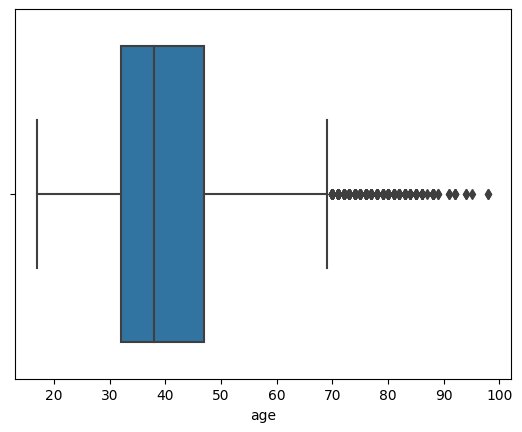

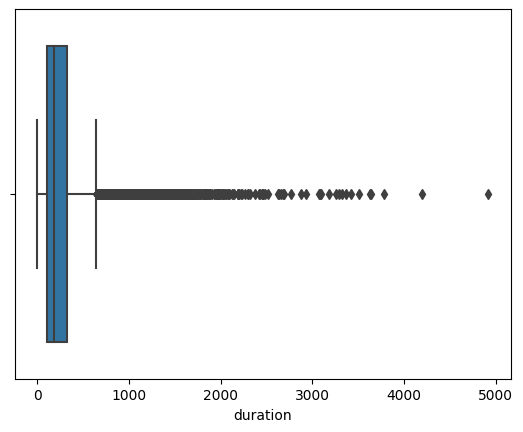

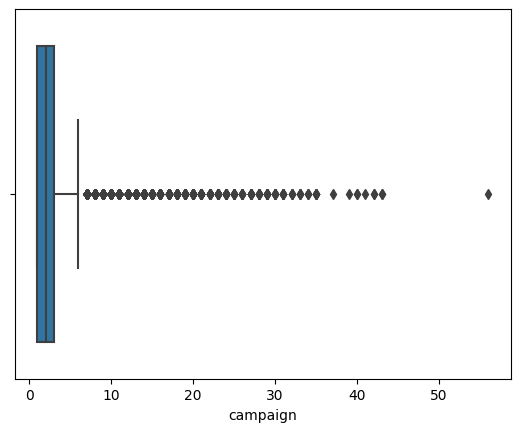

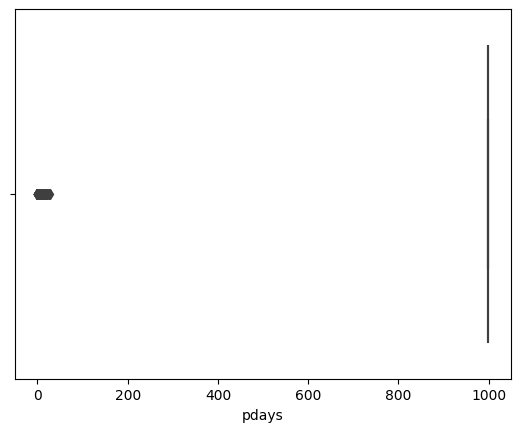

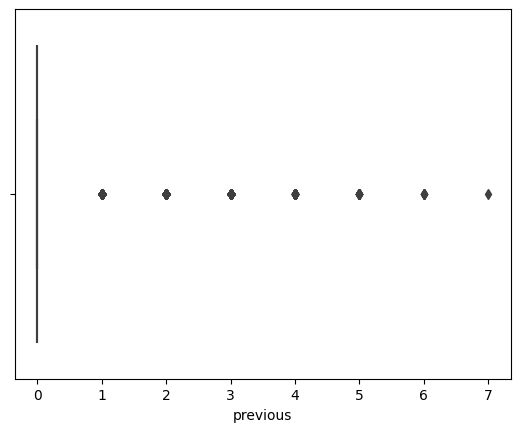

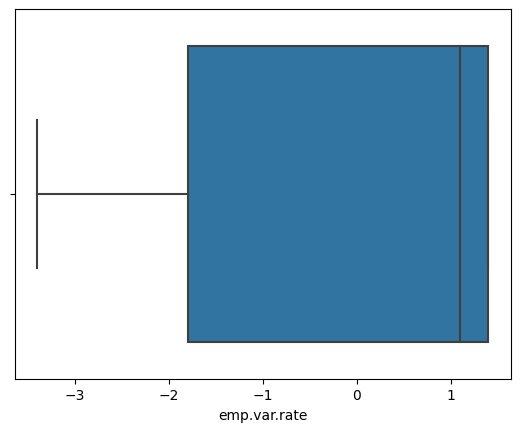

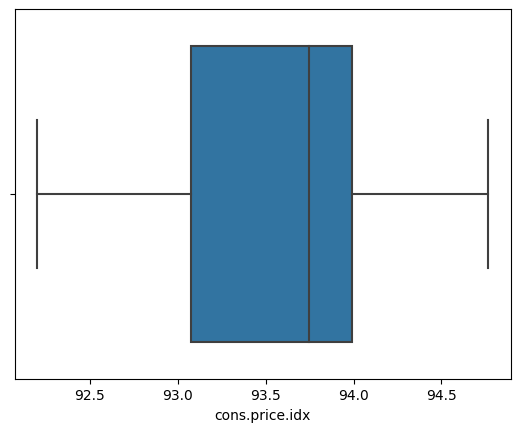

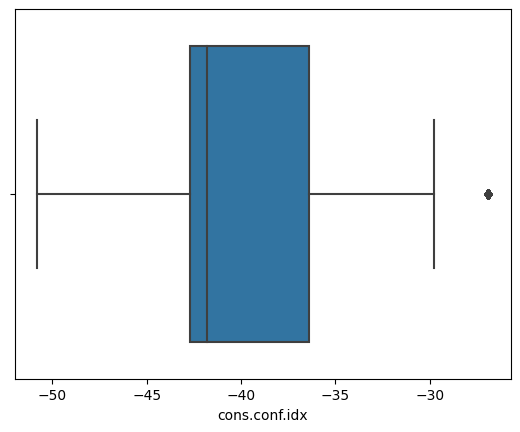

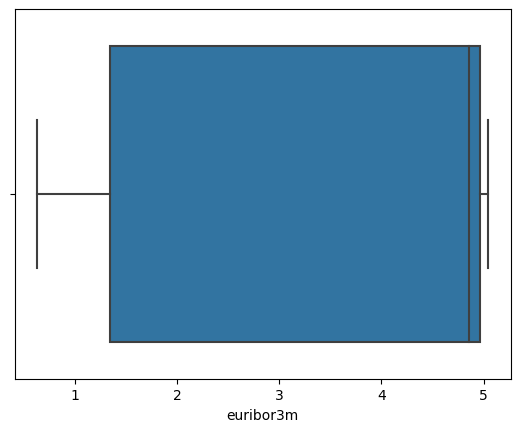

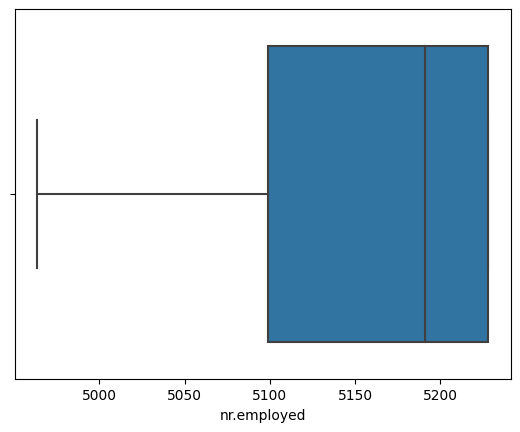

In [8]:
bank_df1_col=list(bank_df1.columns)
for i in bank_df1_col:
    if bank_df1[i].dtype=='float64':
        plt.figure()
        sns.boxplot(x=bank_df1[i])
    else:
        pass

In [9]:
q1=bank_df1.quantile(0.25)
q3=bank_df1.quantile(0.75)
IQR=q3-q1
L=q1-1.5*IQR
bank_df1=bank_df1[~((bank_df1<(q1-1.5*IQR)) | (bank_df1>(q3+1.5*IQR))).any(axis=1)]

In [10]:
bank_df1.shape

(30360, 21)

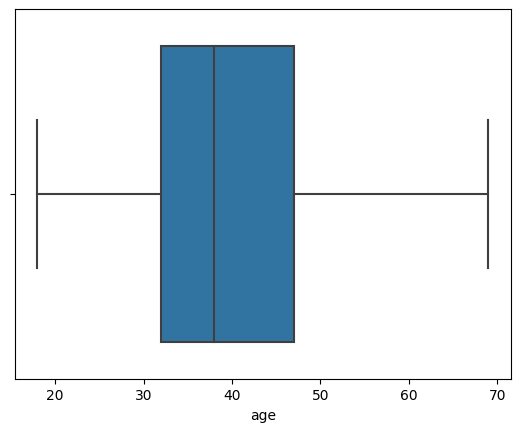

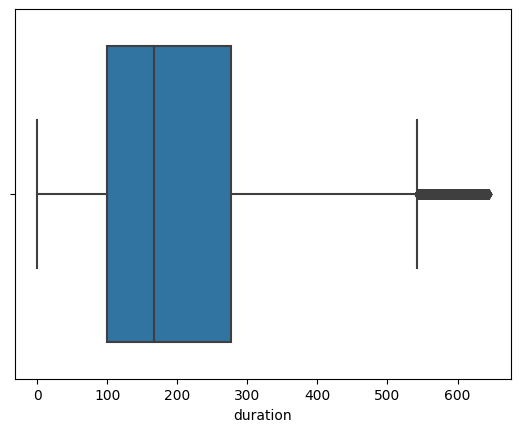

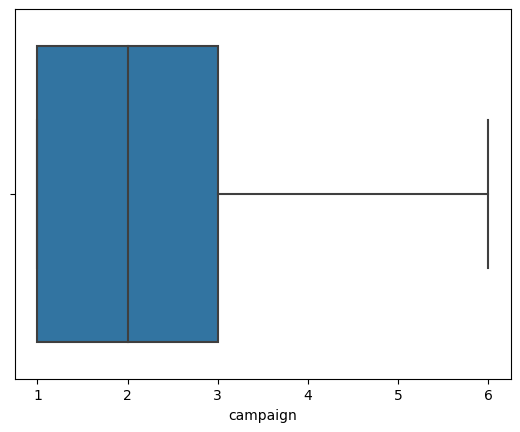

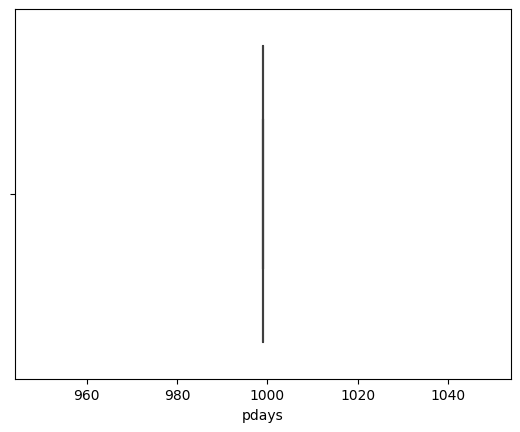

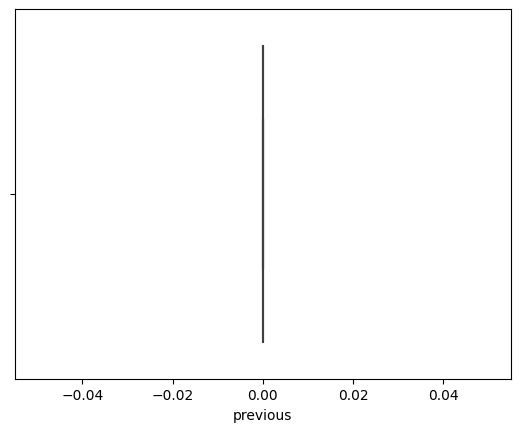

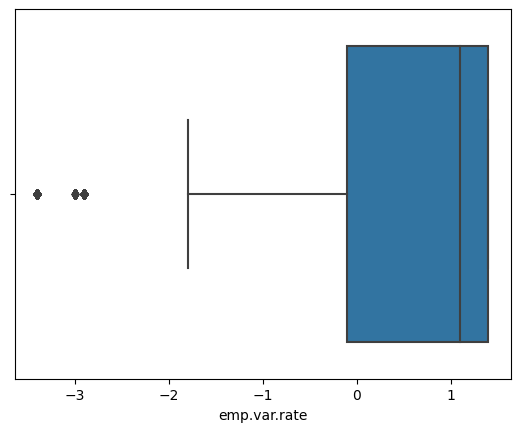

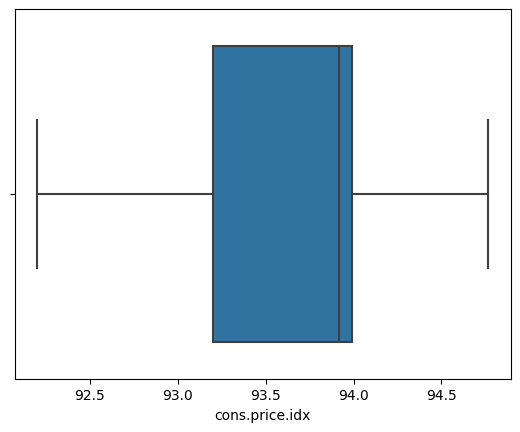

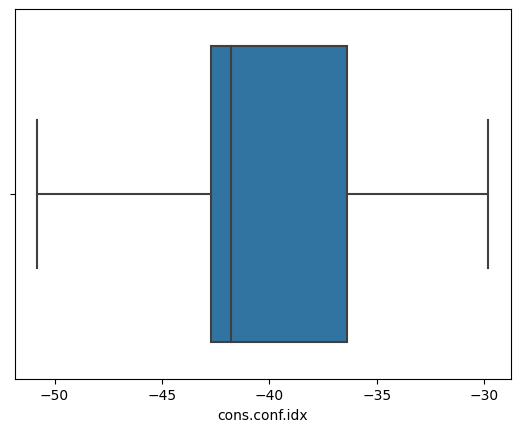

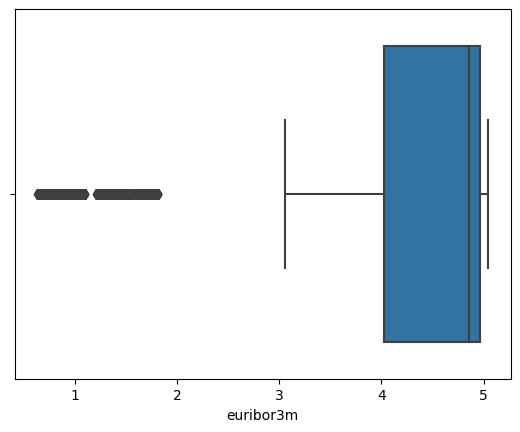

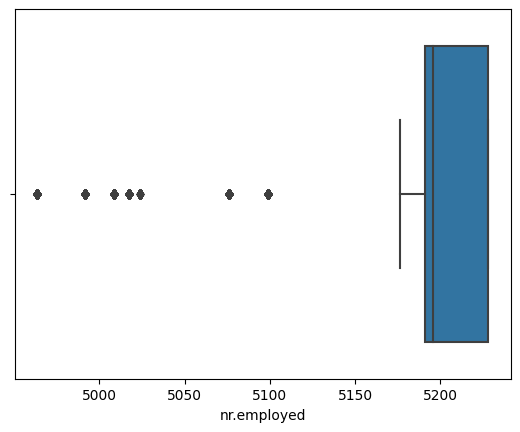

In [11]:
bank_df1_col=list(bank_df1.columns)
for i in bank_df1_col:
    if bank_df1[i].dtype=='float64':
        plt.figure()
        sns.boxplot(x=bank_df1[i])
    else:
        pass


In [12]:
bins=[0,1,5,10,25,50,100]
bank_df1['age']=pd.cut(bank_df1['age'],bins)
bank_df1['age']=bank_df1.age.astype(str)

In [13]:
bank_df1

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,"(50, 100]",housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,"(50, 100]",services,married,high.school,unknown,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,"(25, 50]",services,married,high.school,no,yes,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,"(25, 50]",admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,"(50, 100]",services,married,high.school,no,no,yes,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41180,"(25, 50]",admin.,married,university.degree,no,no,no,cellular,nov,fri,...,2.0,999.0,0.0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41181,"(25, 50]",admin.,married,university.degree,no,yes,no,cellular,nov,fri,...,1.0,999.0,0.0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1
41184,"(25, 50]",blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1.0,999.0,0.0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41185,"(50, 100]",retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2.0,999.0,0.0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0


In [14]:
bank_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30360 entries, 0 to 41186
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             30360 non-null  object 
 1   job             30360 non-null  object 
 2   marital         30360 non-null  object 
 3   education       30360 non-null  object 
 4   default         30360 non-null  object 
 5   housing         30360 non-null  object 
 6   loan            30360 non-null  object 
 7   contact         30360 non-null  object 
 8   month           30360 non-null  object 
 9   day_of_week     30360 non-null  object 
 10  duration        30360 non-null  float64
 11  campaign        30360 non-null  float64
 12  pdays           30360 non-null  float64
 13  previous        30360 non-null  float64
 14  poutcome        30360 non-null  object 
 15  emp.var.rate    30360 non-null  float64
 16  cons.price.idx  30360 non-null  float64
 17  cons.conf.idx   30360 non-null 

In [15]:
col_obj=[]
for i in bank_df1.columns:
    if ((bank_df1[i].dtype==object)&(i!='y')):
        col_obj.append(i)
col_obj

['age',
 'job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome']

In [16]:
from sklearn.preprocessing import LabelEncoder
LB=LabelEncoder()
for i in col_obj:
    bank_df1[i]=LB.fit_transform(bank_df1[i])

In [17]:
bank_df1

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,2,3,1,0,0,0,0,1,6,1,...,1.0,999.0,0.0,0,1.1,93.994,-36.4,4.857,5191.0,0
1,2,7,1,3,1,0,0,1,6,1,...,1.0,999.0,0.0,0,1.1,93.994,-36.4,4.857,5191.0,0
2,1,7,1,3,0,2,0,1,6,1,...,1.0,999.0,0.0,0,1.1,93.994,-36.4,4.857,5191.0,0
3,1,0,1,1,0,0,0,1,6,1,...,1.0,999.0,0.0,0,1.1,93.994,-36.4,4.857,5191.0,0
4,2,7,1,3,0,0,2,1,6,1,...,1.0,999.0,0.0,0,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41180,1,0,1,6,0,0,0,0,7,0,...,2.0,999.0,0.0,0,-1.1,94.767,-50.8,1.028,4963.6,0
41181,1,0,1,6,0,2,0,0,7,0,...,1.0,999.0,0.0,0,-1.1,94.767,-50.8,1.028,4963.6,1
41184,1,1,1,5,0,0,0,0,7,0,...,1.0,999.0,0.0,0,-1.1,94.767,-50.8,1.028,4963.6,0
41185,2,5,1,6,0,2,0,0,7,0,...,2.0,999.0,0.0,0,-1.1,94.767,-50.8,1.028,4963.6,0


In [18]:
bank_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30360 entries, 0 to 41186
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             30360 non-null  int32  
 1   job             30360 non-null  int32  
 2   marital         30360 non-null  int32  
 3   education       30360 non-null  int32  
 4   default         30360 non-null  int32  
 5   housing         30360 non-null  int32  
 6   loan            30360 non-null  int32  
 7   contact         30360 non-null  int32  
 8   month           30360 non-null  int32  
 9   day_of_week     30360 non-null  int32  
 10  duration        30360 non-null  float64
 11  campaign        30360 non-null  float64
 12  pdays           30360 non-null  float64
 13  previous        30360 non-null  float64
 14  poutcome        30360 non-null  int32  
 15  emp.var.rate    30360 non-null  float64
 16  cons.price.idx  30360 non-null  float64
 17  cons.conf.idx   30360 non-null 

In [19]:
pd.options.display.float_format='{:,2f}'.format

In [20]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
col_list=[]
for col in bank_df1.columns:
    if((bank_df1[col].dtype !='object')&(i!='y')):
        col_list.append(col)
X=bank_df1[col_list]
vif_data=pd.DataFrame()
vif_data["feature"]=X.columns
VIF=[variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
VIF

[1.099806545609486,
 1.0253646445814237,
 1.095777331573992,
 1.099320416026542,
 1.091979355014353,
 1.0131533960344912,
 1.003025637676091,
 2.719023099966927,
 2.059461964146657,
 1.0108726975253457,
 1.0118860213174536,
 1.0195936903055052,
 771279.5787717536,
 nan,
 nan,
 41.96061822532373,
 8.723056951862084,
 3.8748947295728757,
 88.84035057176983,
 35.20519634749221]

In [22]:
bank_df1=bank_df1.drop(columns=['pdays'])
bank_df1

KeyError: "['pdays'] not found in axis"

In [40]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
col_list=[]
for col in bank_df1.columns:
    if((bank_df1[col].dtype !='object')&(i!='y')):
        col_list.append(col)
X=bank_df1[col_list]
vif_data=pd.DataFrame()
vif_data["feature"]=X.columns
VIF=[variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
VIF

[1.099806545609486,
 1.0253646445814237,
 1.095777331573992,
 1.099320416026542,
 1.091979355014353,
 1.0131533960344912,
 1.003025637676091,
 2.719023099966927,
 2.059461964146657,
 1.0108726975253457,
 1.0118860213174536,
 1.0195936903055052,
 771279.5787717536,
 nan,
 nan,
 41.96061822532373,
 8.723056951862084,
 3.8748947295728757,
 88.84035057176983,
 35.20519634749221]

In [ ]:
x=bank_df1.iloc[:,:-1]
y=bank_df1.iloc[:,-1]

In [ ]:
x.iloc[:,12:24]

In [ ]:
x=pd.get_dummies(x)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=0)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [ ]:
from sklearn.linear_model import LogisticRegression

LR=LogisticRegression()
LR.fit(X_train,y_train)

In [ ]:
bank_df1[y]=np.where(bank_df1['y']=='yes',1,0)
bank_df1[y]=bank_df1[y].astype(str)